# Find places where there are mice in the background and save it/pass it

## Instructions

This file has to be located in the same folder as the BACKGROUND images, it assumes so. Once it is there, open it and run (either with CTRL+Enter or by clicking on the black triangle with the label *Run* 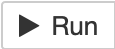 when they are selected) the cells below in the following order:

1. first run the cell right below, it starts with `import matplotlib.pyplot as plt`
2. then the three below, it's just checks. First should give you a name, second starts with `for j, name in enumerate(files_bcg[:10]):` and should hopefully give 10 lines with `Matrix shape: (2048, 2048)` and the last is the code itself, it's a long code. Now this is important. Once you run it (if it doesn't give an error), it's gonna go over all files in the directory, loads them and looks for positions with mice. If it *thinks* there is a mouse, it will print the mouse number, slot, name and most importantly, the **unique_label**. Further more, it will also show the position, ie show the mouse (in the better case). Your task is to go over all those images and check that it actually shows a mouse and not some noise or some random nonsense. THIS IS VERY IMPORTANT! It's gonna take a while but I believe it's gonna go much faster than you checking it, so do not worry. Once you find some bad image, copy the **unique_label** and save it into your prepared xlsx file named *remove.xlsx* which is also in the directory. Put this label into a row in the column named *unique_labels*. Once you're done with that -- once you reach the end -- go to point 3. By now there will be already a csv file with all the relevant details.
3. Once you have done this and SAVED the remove.xlsx file, run the next starting with `bad_slots = pd.read_excel('./remove.xlsx')`. This piece will remove the bad ones from the list of all meaning they will not be processed later.
4. Congratulations, you're done. There will be in your folder 2 csv files, one the original, one the cleaned one. Send me both.


## NOTE:
If you got new data and do not want to go over all the previously generated figures, try the following code. If you are unsure, consult.

In case you want to run the full dataset or are unsure, jump [here](#Run-the-full-dataset).

In [ ]:
import h5py
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importing module for functions
functions_modul =  "./functions"
sys.path.insert(0, functions_modul)

from load_h5_into_np import load_h5_into_np

# path to example files
file_path_bcg = "./"

# path to csv with data -- assumes the same folder but can be speficied
csv_idx_path = './' # good_mice_idx.csv

# get the list of all img
files_bcg = [x for x in os.listdir(file_path_bcg) if x.endswith(".h5")]

# ge the list of todo
files_bcg_todo = list(set(files_bcg) - set(pd.read_csv(os.path.join(csv_idx_path, 'good_mice_idx.csv')).name.unique()))

print(f"There are {len(files_bcg_todo)} files to be processed. Is that correct?")

In [ ]:
off = 70 # offset for mice positions
background = 100 # threshold for selecting a mouse, arbitrary, mouse is always above this, noise always below, still needs eye-check
df = pd.DataFrame(
    columns=[
        "name",
        "unique_label",
        "slot",
        "type"
    ])

for j, name in enumerate(files_bcg_todo):
    # load the arr
    tmp_arr = load_h5_into_np(os.path.join(file_path_bcg, name))
    # loop only over correct shape
    if tmp_arr.shape == (2048, 2048):
        for i in range(5):
            y = tmp_arr[off + (440 * i) : off + (440 * (i + 1)), 250:]
            print("mean ", y.mean())
            if y.mean()> background:
#                 plt.imshow(y > background)
                plt.imshow(y)
                plt.show()
                # create unique label
                k = name.split("_")[5][-1] #int(name.split("_")[5][-1])
                unique_label = name.split("_")[3]+ "_m" + str(k)+ "_"+ name.split("_")[0]+ "_slot"+ str(i)
                print(f"-->  Mouse {j} slot {i} name {name}\nID: {unique_label}\n")
                # update the dataframe
                df = df.append(
                    {   "name": name,
                        "unique_label": unique_label,
                        "slot": i,
                        "type": name.split("_")[3],
                    },
                    ignore_index=True,
                )

df.to_csv('./good_mice_idx_new.csv', index=False)      

-------
# 

# 
-----

# Run the full dataset

In [ ]:
import h5py
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importing module for functions
functions_modul =  "./functions"
sys.path.insert(0, functions_modul)

from load_h5_into_np import load_h5_into_np

# load example files
file_path_bcg = "./"
files_bcg = [x for x in os.listdir(file_path_bcg) if x.endswith(".h5")]

## Mice localisation

Rather then to try to localise mice based on their fluorescence, do it as in the background trial, ie based on their name. There are a few reasons for doing so:
1) based on the lines above, there are some slots, some mice, where the signal is around 22-25. This is very low, compared to the control group where it's around 16 or 17 and seems like they go to the background. They could hence easily be missed. Furthermore, setting this threshold manually is dangerous.

2) Although the name-based system has potential flaws (eg. having 2 mice instead of one or 4 instead of 3), it is quite unlikely that this would happen and if so, we would have anyway hard times determining what to do with it.

---
#### Update 25.3.2021

Another way of getting the positions is to look at the background (white light). They should be visible there and then one could just simply take that, go over all positions, save the occupied position numbers together with the mice names and then just use this. It should be simple and goes around all the previously mentioned problems.



---
Mice naming

To be consistent, each mouse will get a name in the following manner:

*type_mX_imYYY_slotI*

where X will be either its name (1,2,3) or its order if all are present (first, second, third), imYYY is the unique number to the file generated during conversion, type is the treatment and slot I is the slot where the mouse is. The rest will be obtained through other functions.

In [ ]:
print(files_bcg[0])
files_bcg[0].split("_")[5]

In [ ]:
for j, name in enumerate(files_bcg[:10]):
    # load the arr
    tmp_arr = load_h5_into_np(os.path.join(file_path_bcg, name))

In [ ]:
off = 70 # offset for mice positions
background = 100 # threshold for selecting a mouse, arbitrary, mouse is always above this, noise always below, still needs eye-check
df = pd.DataFrame(
    columns=[
        "name",
        "unique_label",
        "slot",
        "type"
    ])

for j, name in enumerate(files_bcg):
    # load the arr
    tmp_arr = load_h5_into_np(os.path.join(file_path_bcg, name))
    # loop only over correct shape
    if tmp_arr.shape == (2048, 2048):
        for i in range(5):
            y = tmp_arr[off + (440 * i) : off + (440 * (i + 1)), 250:]
            print("mean ", y.mean())
            if y.mean()> background:
#                 plt.imshow(y > background)
                plt.imshow(y)
                plt.show()
                # create unique label
                k = name.split("_")[5][-1] #int(name.split("_")[5][-1])
                unique_label = name.split("_")[3]+ "_m" + str(k)+ "_"+ name.split("_")[0]+ "_slot"+ str(i)
                print(f"-->  Mouse {j} slot {i} name {name}\nID: {unique_label}\n")
                # update the dataframe
                df = df.append(
                    {   "name": name,
                        "unique_label": unique_label,
                        "slot": i,
                        "type": name.split("_")[3],
                    },
                    ignore_index=True,
                )

df.to_csv('./good_mice_idx.csv', index=False)                
# check if unique label is unique
# if len(df.unique_label.unique()) != len(???)

In [ ]:
bad_slots = pd.read_excel('./remove.xlsx')
df[~df.unique_label.isin(bad_slots.unique_labels)].to_csv('./good_mice_idx_cleaned.csv', index=False)

In [ ]:
%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu -iv